# Lab: Mạng Nơ-ron Nhân tạo (ANN) với PyTorch

## Giới thiệu
Trong lab này, chúng ta sẽ khám phá Mạng Nơ-ron Nhân tạo (ANN) - một "bộ não máy tính" đơn giản học từ dữ liệu. Nó giống như dạy máy tính phân biệt mèo và chó bằng cách cho nó xem nhiều ví dụ. Chúng ta sẽ:
- Tạo dữ liệu tự nghĩ ra: điểm trong vòng tròn và vành đai.
- Dùng PyTorch để xây dựng mô hình ANN. :)))
- Xem ANN phân loại thế nào qua hình ảnh trực quan.

Hãy nghĩ ANN như một chiếc bánh sandwich: có lớp đầu vào, lớp ẩn "nêm gia vị", và lớp đầu ra cho kết quả nha :) Ahihi

## Lý thuyết về ANN

### 1. ANN là gì?
- **Định nghĩa**: Mạng Nơ-ron Nhân tạo (ANN) là một cách để máy tính học từ dữ liệu, giống như bạn dạy một đứa trẻ nhận biết mèo và chó bằng cách chỉ cho nó nhiều hình ảnh.  
- **Tại sao dùng ANN?**: Vì nó giỏi tìm quy luật trong dữ liệu phức tạp, như phân biệt điểm thuộc vòng tròn hay vành đai – thứ mà đường thẳng đơn giản không làm được.  
- **Ví dụ**: Nếu chúng ta có 300 điểm và muốn biết điểm nào thuộc nhóm nào, ANN tự học từ dữ liệu thay vì chúng ta phải viết quy tắc bằng tay.


### 2. Cấu trúc ANN
- ANN giống như một đội làm việc có 3 nhóm:  
  - **Lớp đầu vào**: Nhóm nhận thông tin. Ở đây có 2 người (2 nút), một người nhận $x$, một người nhận $y$.  
    - **Ví dụ**: Điểm (1, 2) vào, nút 1 nhận $1$, nút 2 nhận $2$.  
  - **Lớp ẩn**: Nhóm phân tích thông tin, có 4 người (4 nút) để "nghĩ" sâu hơn.  
    - **Tại sao 4 nút?**: Đây là lựa chọn trong lab này để thử nhiều cách nhìn dữ liệu, giúp tìm quy luật tốt hơn. Số nút có thể thay đổi tùy bài toán.  
    - **Ví dụ**: Họ nhìn $(1, 2)$ và tính xem nó gần gốc tọa độ hay xa.  
  - **Lớp đầu ra**: Nhóm đưa ra kết quả cuối, chỉ cần 1 người (1 nút) nói "lớp 0" hay "lớp 1".  
    - **Ví dụ**: Kết quả $0.7$ nghĩa là nghiêng về lớp 1.  

- **Hình ảnh minh họa**:  
  - Sơ đồ:  
    - Bên trái: 2 vòng tròn (đầu vào: $x, y$).  
    - Giữa: 4 vòng tròn nối với 2 vòng tròn trước bằng mũi tên (lớp ẩn).  
    - Bên phải: 1 vòng tròn nối với 4 vòng tròn giữa (đầu ra).  
  - Mỗi mũi tên là "trọng số" – độ quan trọng của thông tin.  
  - **Xem hình**: 

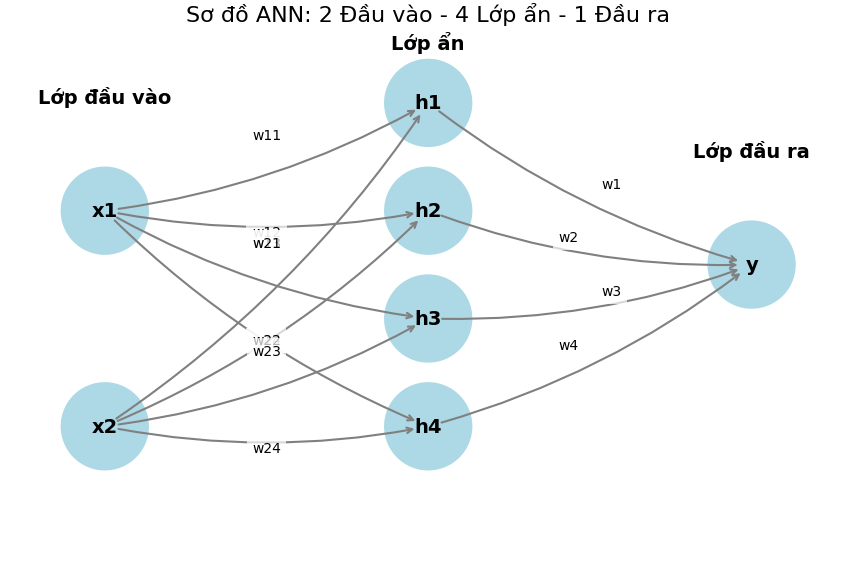



### 3. Trọng số và độ chệch
- **Trọng số (weights)**: Mỗi người trong lớp ẩn "đánh giá" $x$ và $y$ khác nhau, dựa trên độ quan trọng.  
  - **Ví dụ số**: Giả sử trọng số $w_1 = 0.5$, $w_2 = 0.3$. Với $x = 1$, $y = 2$, tổng là:  
    $$
    z = 0.5 \cdot 1 + 0.3 \cdot 2 = 0.5 + 0.6 = 1.1
    $$
  - **Tại sao lại cần thiết?**: Để quyết định $x$ hay $y$ ảnh hưởng nhiều hơn đến kết quả.  
- **Độ chệch(bias)**: Một số nhỏ thêm vào để điều chỉnh cho đúng.  
  - **Ví dụ số**: Nếu $b = 0.2$, tổng thành:  
    $$
    z = 1.1 + 0.2 = 1.3
    $$
  - **Tại sao độ chệch lại cần thiết?**: Để tránh kết quả bị lệch quá xa (như luôn gần $0$ dù dữ liệu lớn).  
- **Công thức đầy đủ**:  
  $$
  z = w_1 \cdot x + w_2 \cdot y + b
  $$

### 4. Hàm kích hoạt
- ANN không chỉ cộng trừ đơn giản (như máy tính cơ bản), mà còn hiểu được dữ liệu phức tạp nhờ hàm kích hoạt.  
- **ReLU (Rectified Linear Unit)**: Giữ số dương, bỏ số âm.  
  - **Công thức**:  
    $$
    \phi(z) = \max(0, z)
    $$
  - **Ví dụ số**: Với $z = 1.3$ thì $\phi(1.3) = 1.3$; với $z = -0.5$ thì $\phi(-0.5) = 0$.  
  - **Khi nào dùng ReLU?**: Thường dùng ở lớp ẩn vì nó đơn giản, nhanh, và giúp "tắt" những tính toán không quan trọng (khi $z < 0$), tập trung vào dữ liệu có ý nghĩa lớn hơn. Nó cũng tránh vấn đề gradient biến mất khi mạng sâu.  
- **Sigmoid**: Biến số thành xác suất từ $0$ đến $1$.  
  - **Công thức**:  
    $$
    \phi(z) = \frac{1}{1 + e^{-z}}
    $$
  - **Ví dụ số**: Với $z = 1.3$, $e^{-1.3} \approx 0.27$, nên:  
    $$
    \phi(1.3) \approx \frac{1}{1 + 0.27} \approx 0.79
    $$
  - **Khi nào dùng Sigmoid?**: Thường dùng ở lớp đầu ra khi cần kết quả dạng xác suất (ví dụ, phân loại nhị phân: $0$ hoặc $1$). Tuy nhiên, nó ít được dùng ở lớp ẩn vì dễ gây gradient nhỏ khi $z$ quá lớn hoặc quá nhỏ, làm chậm học.  

- **Hình ảnh minh họa**:  
  - **ReLU**: Đường thẳng từ $(0,0)$ lên khi $z > 0$, nằm ngang ở $0$ khi $z < 0$.  
  - **Sigmoid**: Đường cong mềm từ $0$ (khi $z$ âm lớn) đến $1$ (khi $z$ dương lớn), đi qua $0.5$ khi $z = 0$.  
  - **Xem hình**:
  
  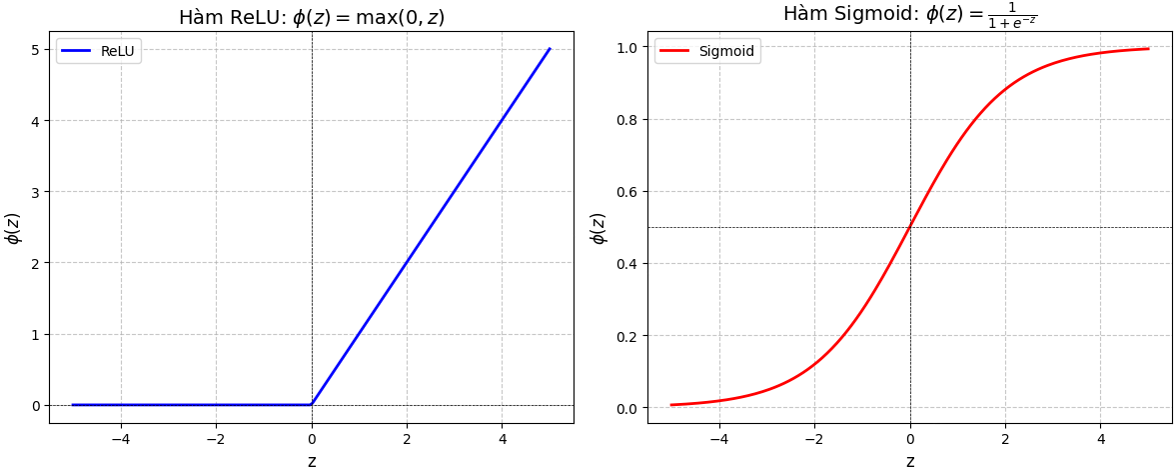

### 5. Lan truyền tiến (Forward Propagation)
- **Quy trình**: Dữ liệu đi qua từng lớp như chuyền bóng:  
  1. Từ đầu vào: $x = 1$, $y = 2$.  
  2. Lớp ẩn tính (giả sử 1 nút):  
     $$
     z = 0.5 \cdot 1 + 0.3 \cdot 2 + 0.2 = 1.3
     $$
     Sau đó, ReLU cho $\phi(1.3) = 1.3$.  
  3. Lớp đầu ra tính tiếp (giả sử trọng số $w = 0.4$, bias $b = 0.1$):  
     $$
     z = 0.4 \cdot 1.3 + 0.1 = 0.52 + 0.1 = 0.62
     $$
     Và Sigmoid cho $\phi(0.62) \approx 0.65$.  
- **Kết quả**: $0.65$ nghĩa là $65\%$ thuộc lớp 1.  
- **Lan truyền tiến để làm gì?**: Để dự đoán từ dữ liệu ban đầu qua các lớp.

### 6. Hàm mất mát (Loss Function)
- **Ý nghĩa**: Đo sai lầm giữa dự đoán và thực tế. Nếu dự đoán gần giá trị thực, mất mát nhỏ; nếu lệch xa, mất mát lớn.  
- **Công thức từ đâu mà có?**: Trong bài toán phân loại nhị phân (0 hoặc 1), ta dùng **Binary Cross-Entropy Loss**, dựa trên lý thuyết xác suất. Ý tưởng là so sánh phân phối xác suất dự đoán ($\hat{y}$) với nhãn thật ($y$), lấy log để phạt nặng hơn khi sai lệch lớn. Công thức:  
  $$
  L = -[y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]
  $$
  - $y$: Nhãn thực tế (0 hoặc 1).  
  - $\hat{y}$: Xác suất dự đoán từ Sigmoid (0 đến 1).  
  - **Giải thích**: Nếu $y = 1$, ta muốn $\hat{y}$ gần 1, nên $-\log(\hat{y})$ nhỏ khi $\hat{y}$ lớn; nếu $y = 0$, ta muốn $\hat{y}$ gần 0, nên $-\log(1 - \hat{y})$ nhỏ khi $\hat{y}$ nhỏ.  
- **Ví dụ**:  
  - Nếu $y = 1$ và $\hat{y} = 0.8$:  
    - $L = -\log(0.8) \approx 0.22$, dự đoán khá tốt.  
  - Nếu $y = 0$ và $\hat{y} = 0.3$:  
    - $L = -\log(1 - 0.3) = -\log(0.7) \approx 0.36$, cũng tương đối ổn.  
- **Trong lab**: Hàm mất mát tổng là trung bình của $L$ trên tất cả mẫu (ví dụ, dùng `nn.BCELoss()` với `X_train`).

### 7. Lan truyền ngược (Backpropagation)
- **Quy trình**: Sửa sai từ cuối về đầu:  
  1. Tính lỗi ở đầu ra: Với dự đoán $\hat{y} = 0.65$ và thực tế $y = 1$, lỗi là $y - \hat{y} = 0.35$ (trực giác đơn giản, thực tế dùng gradient).  
  2. Quay lại lớp ẩn: Xác định lỗi do trọng số nào gây ra bằng đạo hàm (gradient).  
  3. Điều chỉnh: Giảm trọng số nếu làm $z$ quá nhỏ, tăng nếu quá lớn.  
- **Công thức?**: Dựa trên **quy tắc chuỗi (chain rule)** trong vi tích phân. Gradient của mất mát $L$ theo trọng số $w$ được tính qua các lớp:  
  - Bước 1: Gradient của $L$ theo $\hat{y}$:  
    $$
    \frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
    $$
  - Bước 2: Gradient của $\hat{y}$ theo $z$ (với Sigmoid):  
    $$
    \frac{\partial \hat{y}}{\partial z} = \hat{y} \cdot (1 - \hat{y})
    $$
  - Bước 3: Gradient của $z$ theo $w$ (với $z = w \cdot x + b$):  
    $$
    \frac{\partial z}{\partial w} = x
    $$
  - Tổng hợp:  
    $$
    \frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial w}
    $$
  - Cập nhật trọng số:  
    $$
    w = w - \alpha \cdot \frac{\partial L}{\partial w}
    $$
    ($\alpha$ là tốc độ học, ví dụ $0.01$).  
- **Ví dụ số**: Nếu $w = 0.5$, gradient $\frac{\partial L}{\partial w} \approx 0.35$ (giả định đơn giản), thì:  
  $$
  w = 0.5 - 0.01 \cdot 0.35 = 0.4965
  $$
- **Tại sao dùng lan truyền ngược?**: Để lần sau dự đoán chính xác hơn bằng cách điều chỉnh trọng số dựa trên lỗi.

### BTVN1: Chứng minh bước 1 và bước 2

### 8. Tối ưu hóa (Optimizer)
- **Ý nghĩa**: Giúp ANN sửa sai nhanh chóng và hiệu quả.  
- **Adam**: Một thuật toán tối ưu tiên tiến, kết hợp động lượng và RMSProp để cập nhật trọng số thông minh (như GPS tìm đường ngắn nhất).  
- **Ví dụ**: Thay vì chỉ điều chỉnh nhỏ đều đặn, Adam thay đổi lớn khi cần nhưng vẫn đảm bảo chính xác.  
- **Sử dụng tối ưu hóa để làm gì?**: Để ANN học nhanh hơn và đạt hiệu quả cao từ dữ liệu.

In [4]:
import torch                          # Thư viện deep learning chính
import torch.nn as nn                 # Chứa các lớp mạng (Linear, ReLU,...)
import torch.optim as optim           # Chứa optimizer (Adam, SGD,...)
from sklearn.datasets import make_circles  # Tạo dữ liệu hình tròn
from sklearn.model_selection import train_test_split  # Chia train/test
import matplotlib.pyplot as plt       # Vẽ đồ thị


## Tạo dữ liệu tự tạo

Ta tạo 2 nhóm điểm:
- **Lớp 0**: Điểm trong vòng tròn nhỏ (bán kính 1). Ví dụ: gần gốc tọa độ.
- **Lớp 1**: Điểm trong vành đai (bán kính 1 đến 2). Ví dụ: xa gốc hơn.

Cách tạo:
- Dùng số ngẫu nhiên $u$ từ 0 đến 1, góc $\theta$ từ 0 đến $2\pi$.
- Lớp 0: $r = \sqrt{u}$.
- Lớp 1: $r = \sqrt{3u + 1}$.

Số điểm: 100 cho lớp 0, 200 cho lớp 1. Chia 80% để học, 20% để kiểm tra.


In [5]:
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)  # 300 điểm, 2 vòng tròn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    # 80% train, 20% test
X_train = torch.tensor(X_train, dtype=torch.float32)  # Chuyển sang tensor
X_test = torch.tensor(X_test, dtype=torch.float32)    # Chuyển sang tensor
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape thành cột
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)    # Reshape thành cột


## Xây ANN bằng PyTorch
ANN đơn giản:
- **Lớp đầu vào**: 2 nút (x, y).
- **Lớp ẩn**: 4 nút với ReLU để "nghĩ".
- **Lớp đầu ra**: 1 nút với Sigmoid để ra 0 hoặc 1.

Học bằng:
- **Hàm mất mát**: BCELoss (đo sai lầm).
- **Tối ưu hóa**: Adam (điều chỉnh thông minh).
- Học 100 lần (epochs), mỗi lần dùng 32 điểm (batch).

In [6]:
class ANN(nn.Module):                    # Kế thừa từ nn.Module
    def __init__(self):                  # Hàm khởi tạo
        super(ANN, self).__init__()      # Gọi init của class cha
        self.layer1 = nn.Linear(2, 4)    # 2 input → 4 neuron ẩn (z = Wx + b)
        self.relu = nn.ReLU()            # max(0, x) - bỏ số âm
        self.layer2 = nn.Linear(4, 1)    # 4 neuron → 1 output
        self.sigmoid = nn.Sigmoid()      # Ép về [0,1] thành xác suất

    def forward(self, x):                # Định nghĩa luồng dữ liệu
        x = self.layer1(x)               # Qua lớp 1: z = Wx + b
        x = self.relu(x)                 # Áp dụng ReLU
        x = self.layer2(x)               # Qua lớp 2
        x = self.sigmoid(x)              # Áp dụng Sigmoid
        return x                         # Trả về xác suất

model = ANN()                            # Tạo model
criterion = nn.BCELoss()                 # Hàm tính lỗi cho 2 lớp
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam với lr=0.01

epochs = 100                             # Số vòng lặp
for epoch in range(epochs):              # Lặp 100 lần
    model.train()                        # Bật chế độ train
    optimizer.zero_grad()                # Xóa gradient cũ
    outputs = model(X_train)             # Dự đoán
    loss = criterion(outputs, y_train)   # Tính lỗi
    loss.backward()                      # Tính gradient (backpropagation)
    optimizer.step()                     # Cập nhật trọng số
    if (epoch + 1) % 20 == 0:            # In mỗi 20 epoch
        print(f"Epoch [{epoch+1}/{epochs}], loss: {loss.item():.4f}")


Epoch [20/100], loss: 0.6879
Epoch [40/100], loss: 0.6760
Epoch [60/100], loss: 0.6664
Epoch [80/100], loss: 0.6559
Epoch [100/100], loss: 0.6422


## Kiểm tra mô hình ANN
ANN đoán đúng bao nhiêu trên dữ liệu kiểm tra. Nếu dự đoán > 0.5 thì là lớp 1, nhỏ hơn là lớp 0.

In [7]:
model.eval()                             # Bật chế độ đánh giá
with torch.no_grad():                    # Tắt tính gradient
    predictions = model(X_test)          # Dự đoán trên test
    predicted_labels = (predictions >= 0.5).float()  # >=0.5 → lớp 1
    accuracy = (predicted_labels == y_test).float().mean()  # Tính accuracy
    print(f"Accuracy: {accuracy.item()*100:.2f}%")


Accuracy: 63.33%


## Visualization

- Điểm lớp 0 (xanh), lớp 1 (đỏ).
- Ranh giới quyết định (màu nền) để xem ANN phân loại thế nào.

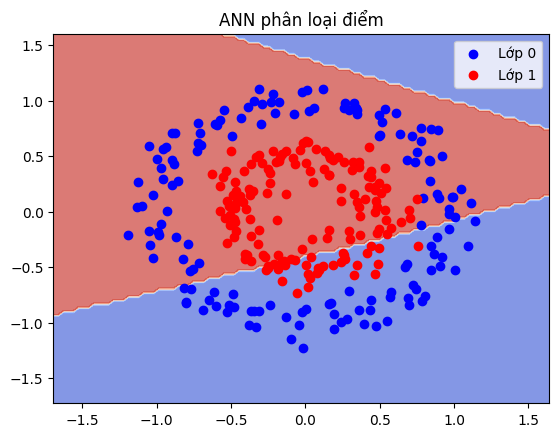

In [8]:
# Tạo lưới để vẽ ranh giới
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

# Dự đoán trên lưới
model.eval()
with torch.no_grad():
    pred_grid = model(grid)
    pred_grid = (pred_grid > 0.5).float().numpy().reshape(xx.shape)

# Vẽ
plt.contourf(xx, yy, pred_grid, alpha=0.7, cmap='coolwarm')  # Ranh giới
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Lớp 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Lớp 1')
plt.legend()
plt.title("ANN phân loại điểm")
plt.show()

## Kết luận
Lab này cho thấy ANN có thể phân loại điểm không tách biệt tuyến tính (vòng tròn và vành đai). Kết quả thay đổi mỗi lần chạy vì dữ liệu ngẫu nhiên - giống như mỗi lần thi điểm khác nhau! Các bạn có thể thử thay đổi số nút hoặc số lần học để xem điều gì xảy ra.

# Bài tập về nhà:

## Mục tiêu
Sau khi hoàn thành lab về ANN, bài tập này giúp bạn củng cố kiến thức bằng cách:
1. Thay đổi cấu trúc ANN và quan sát ảnh hưởng đến hiệu suất.
2. Thử nghiệm với các hàm mất mát và tối ưu hóa khác.
3. Phân tích kết quả qua biểu đồ và số liệu.

## Hướng dẫn
- Sử dụng file `ANN_Lab.ipynb` từ lab làm nền tảng.
- Gửi bài làm dưới dạng file `.ipynb` với phần code và câu trả lời viết trong ô Markdown.
- Hạn nộp: [Điền ngày nộp, ví dụ: 21/03/2025].

## Định dạng nộp bài
- Tạo file `.ipynb` mới với cấu trúc:  
  - **Phần 1**: Code và câu trả lời cho "Thay đổi cấu trúc ANN".  
  - **Phần 2**: Code và câu trả lời cho "Thử nghiệm với hàm mất mát và tối ưu hóa".  
  - **Phần 3**: Code vẽ đồ thị và câu trả lời cho "Phân tích kết quả".  
- Đặt tên file: `[HọTên]_ANN_Homework.ipynb` (ví dụ: `NguyenVanA_ANN_Homework.ipynb`).

# Bài này sẽ học trong 2 tuần 

## Phần 1: Thay đổi cấu trúc ANN
### Yêu cầu
1. **Tăng số nút trong lớp ẩn**:  
   - Sửa lớp ẩn từ 4 nút thành 8 nút trong code định nghĩa `ANN`.  
   - Huấn luyện lại mô hình với cùng dữ liệu `X_train`, `y_train` từ lab (100 epochs).  
   - Ghi lại giá trị mất mát cuối cùng (`loss`) và độ chính xác trên tập kiểm tra (`X_test`, `y_test`).  

2. **Thêm một lớp ẩn**:  
   - Thêm một lớp ẩn thứ hai với 6 nút, dùng ReLU làm hàm kích hoạt. Cấu trúc mới:  
     - Đầu vào: 2 nút.  
     - Lớp ẩn 1: 8 nút (ReLU).  
     - Lớp ẩn 2: 6 nút (ReLU).  
     - Đầu ra: 1 nút (Sigmoid).  
   - Huấn luyện lại mô hình (100 epochs).  
   - Ghi lại giá trị mất mát cuối cùng và độ chính xác.

3. **Câu hỏi**:  
   - So sánh kết quả của 3 mô hình (4 nút, 8 nút, 8+6 nút):  
     - Mất mát cuối cùng thay đổi thế nào?  
     - Độ chính xác có cải thiện không? Tại sao bạn nghĩ vậy?  
   - Viết câu trả lời trong ô Markdown.

---

In [21]:
# Import thu vien
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Tao du lieu
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyen sang tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

print(f"Kich thuoc tap train: {X_train.shape}")
print(f"Kich thuoc tap test: {X_test.shape}")

# Mo hinh 1: 4 nut, cau truc 2-4-1
class ANN_4nodes(nn.Module):
    def __init__(self):
        super(ANN_4nodes, self).__init__()
        self.layer1 = nn.Linear(2, 4)    # 2 input, 4 hidden
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)    # 4 hidden, 1 output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Huan luyen mo hinh 4 nut
model_4 = ANN_4nodes()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.01)

print("\nMO HINH 1: 4 NUT\n")
for epoch in range(100):
    model_4.train()
    optimizer.zero_grad()
    outputs = model_4(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/100, Loss: {loss.item():.4f}")

# Danh gia mo hinh 4 nut
model_4.eval()
with torch.no_grad():
    pred = model_4(X_test)
    pred_labels = (pred >= 0.5).float()
    acc_4 = (pred_labels == y_test).float().mean()
    loss_4 = criterion(pred, y_test)
    print(f"\nKet qua mo hinh 4 nut:")
    print(f"Loss: {loss_4.item():.4f}")
    print(f"Accuracy: {acc_4.item()*100:.2f}%")

# Mo hinh 2: 8 nut, cau truc 2-8-1
class ANN_8nodes(nn.Module):
    def __init__(self):
        super(ANN_8nodes, self).__init__()
        self.layer1 = nn.Linear(2, 8)    # 2 input, 8 hidden
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(8, 1)    # 8 hidden, 1 output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

# Huan luyen mo hinh 8 nut
model_8 = ANN_8nodes()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_8.parameters(), lr=0.01)

print("\nMO HINH 2: 8 NUT\n")
for epoch in range(100):
    model_8.train()
    optimizer.zero_grad()
    outputs = model_8(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/100, Loss: {loss.item():.4f}")

# Danh gia mo hinh 8 nut
model_8.eval()
with torch.no_grad():
    pred = model_8(X_test)
    pred_labels = (pred >= 0.5).float()
    acc_8 = (pred_labels == y_test).float().mean()
    loss_8 = criterion(pred, y_test)
    print(f"\nKet qua mo hinh 8 nut:")
    print(f"Loss: {loss_8.item():.4f}")
    print(f"Accuracy: {acc_8.item()*100:.2f}%")

# Mo hinh 3: 8+6 nut, cau truc 2-8-6-1
class ANN_8_6nodes(nn.Module):
    def __init__(self):
        super(ANN_8_6nodes, self).__init__()
        self.layer1 = nn.Linear(2, 8)    # 2 input, 8 hidden1
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(8, 6)    # 8 hidden1, 6 hidden2
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(6, 1)    # 6 hidden2, 1 output
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Huan luyen mo hinh 8+6 nut
model_8_6 = ANN_8_6nodes()
criterion = nn.BCELoss()
optimizer = optim.Adam(model_8_6.parameters(), lr=0.01)

print("\nMO HINH 3: 8+6 NUT\n")
for epoch in range(100):
    model_8_6.train()
    optimizer.zero_grad()
    outputs = model_8_6(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/100, Loss: {loss.item():.4f}")

# Danh gia mo hinh 8+6 nut
model_8_6.eval()
with torch.no_grad():
    pred = model_8_6(X_test)
    pred_labels = (pred >= 0.5).float()
    acc_8_6 = (pred_labels == y_test).float().mean()
    loss_8_6 = criterion(pred, y_test)
    print(f"\nKet qua mo hinh 8+6 nut:")
    print(f"Loss: {loss_8_6.item():.4f}")
    print(f"Accuracy: {acc_8_6.item()*100:.2f}%")

# Bang so sanh
print("\n" + "="*60)
print("BANG SO SANH KET QUA 3 MO HINH")
print("="*60)
print(f"{'Mo hinh':<15} {'Cau truc':<12} {'Loss':<12} {'Accuracy':<12}")
print("-"*60)
print(f"{'4 nut':<15} {'2-4-1':<12} {loss_4.item():<12.4f} {acc_4.item()*100:<12.2f}%")
print(f"{'8 nut':<15} {'2-8-1':<12} {loss_8.item():<12.4f} {acc_8.item()*100:<12.2f}%")
print(f"{'8+6 nut':<15} {'2-8-6-1':<12} {loss_8_6.item():<12.4f} {acc_8_6.item()*100:<12.2f}%")
print("="*60)

Kich thuoc tap train: torch.Size([240, 2])
Kich thuoc tap test: torch.Size([60, 2])

MO HINH 1: 4 NUT

Epoch 20/100, Loss: 0.6772
Epoch 40/100, Loss: 0.6607
Epoch 60/100, Loss: 0.6424
Epoch 80/100, Loss: 0.6215
Epoch 100/100, Loss: 0.6004

Ket qua mo hinh 4 nut:
Loss: 0.6354
Accuracy: 66.67%

MO HINH 2: 8 NUT

Epoch 20/100, Loss: 0.6415
Epoch 40/100, Loss: 0.5938
Epoch 60/100, Loss: 0.5266
Epoch 80/100, Loss: 0.4439
Epoch 100/100, Loss: 0.3608

Ket qua mo hinh 8 nut:
Loss: 0.3923
Accuracy: 96.67%

MO HINH 3: 8+6 NUT

Epoch 20/100, Loss: 0.6605
Epoch 40/100, Loss: 0.6030
Epoch 60/100, Loss: 0.4870
Epoch 80/100, Loss: 0.3572
Epoch 100/100, Loss: 0.2165

Ket qua mo hinh 8+6 nut:
Loss: 0.2170
Accuracy: 96.67%

BANG SO SANH KET QUA 3 MO HINH
Mo hinh         Cau truc     Loss         Accuracy    
------------------------------------------------------------
4 nut           2-4-1        0.6354       66.67       %
8 nut           2-8-1        0.3923       96.67       %
8+6 nut         2-8-6-1  

## Phần 2: Thử nghiệm với hàm mất mát và tối ưu hóa
### Yêu cầu
1. **Dùng BCEWithLogitsLoss thay cho BCELoss**:  
   - Thay `nn.BCELoss()` bằng `nn.BCEWithLogitsLoss()`.  
   - Xóa hàm Sigmoid khỏi lớp đầu ra của mô hình (vì `BCEWithLogitsLoss` tự xử lý).  
   - Huấn luyện lại mô hình với cấu trúc ban đầu (2-4-1, 100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

2. **Thay Adam bằng SGD**:  
   - Dùng lại cấu trúc ban đầu (2-4-1) với `nn.BCELoss()`.  
   - Thay `optim.Adam` bằng `optim.SGD` với `lr=0.01`.  
   - Huấn luyện lại (100 epochs).  
   - Ghi lại mất mát cuối cùng và độ chính xác.

3. **Câu hỏi**:  
   - So sánh kết quả:  
     - `BCEWithLogitsLoss` có khác gì so với `BCELoss` về mất mát và độ chính xác? Tại sao?  
     - `SGD` so với `Adam`: Mất mát giảm nhanh hơn hay chậm hơn? Độ chính xác thay đổi ra sao?  
   - Viết câu trả lời trong ô Markdown.

---

In [22]:
# Thu nghiem 1: BCEWithLogitsLoss, khong can Sigmoid
class ANN_NoSigmoid(nn.Module):
    def __init__(self):
        super(ANN_NoSigmoid, self).__init__()
        self.layer1 = nn.Linear(2, 4)    # 2 input, 4 hidden
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(4, 1)    # 4 hidden, 1 output, khong Sigmoid

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)               # Tra ve logits, khong qua Sigmoid
        return x

model_logits = ANN_NoSigmoid()
criterion_logits = nn.BCEWithLogitsLoss()  # Tu xu ly Sigmoid
optimizer_logits = optim.Adam(model_logits.parameters(), lr=0.01)

print("THU NGHIEM 1: BCEWithLogitsLoss\n")
for epoch in range(100):
    model_logits.train()
    optimizer_logits.zero_grad()
    outputs = model_logits(X_train)
    loss = criterion_logits(outputs, y_train)
    loss.backward()
    optimizer_logits.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/100, Loss: {loss.item():.4f}")

# Danh gia
model_logits.eval()
with torch.no_grad():
    pred = model_logits(X_test)
    pred_labels = (torch.sigmoid(pred) >= 0.5).float()  # Can Sigmoid khi danh gia
    acc_logits = (pred_labels == y_test).float().mean()
    loss_logits = criterion_logits(pred, y_test)
    print(f"\nKet qua BCEWithLogitsLoss:")
    print(f"Loss: {loss_logits.item():.4f}")
    print(f"Accuracy: {acc_logits.item()*100:.2f}%")

# Thu nghiem 2: SGD thay Adam
model_sgd = ANN_4nodes()
criterion_sgd = nn.BCELoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)  # Dung SGD

print("\nTHU NGHIEM 2: SGD\n")
for epoch in range(100):
    model_sgd.train()
    optimizer_sgd.zero_grad()
    outputs = model_sgd(X_train)
    loss = criterion_sgd(outputs, y_train)
    loss.backward()
    optimizer_sgd.step()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/100, Loss: {loss.item():.4f}")

# Danh gia
model_sgd.eval()
with torch.no_grad():
    pred = model_sgd(X_test)
    pred_labels = (pred >= 0.5).float()
    acc_sgd = (pred_labels == y_test).float().mean()
    loss_sgd = criterion_sgd(pred, y_test)
    print(f"\nKet qua SGD:")
    print(f"Loss: {loss_sgd.item():.4f}")
    print(f"Accuracy: {acc_sgd.item()*100:.2f}%")

# Bang so sanh
print("\n" + "="*60)
print("BANG SO SANH PHAN 2")
print("="*60)
print(f"{'Phuong phap':<25} {'Loss':<12} {'Accuracy':<12}")
print("-"*60)
print(f"{'BCELoss + Adam':<25} {loss_4.item():<12.4f} {acc_4.item()*100:<12.2f}%")
print(f"{'BCEWithLogitsLoss':<25} {loss_logits.item():<12.4f} {acc_logits.item()*100:<12.2f}%")
print(f"{'BCELoss + SGD':<25} {loss_sgd.item():<12.4f} {acc_sgd.item()*100:<12.2f}%")
print("="*60)

THU NGHIEM 1: BCEWithLogitsLoss

Epoch 20/100, Loss: 0.6932
Epoch 40/100, Loss: 0.6924
Epoch 60/100, Loss: 0.6924
Epoch 80/100, Loss: 0.6924
Epoch 100/100, Loss: 0.6924

Ket qua BCEWithLogitsLoss:
Loss: 0.6988
Accuracy: 41.67%

THU NGHIEM 2: SGD

Epoch 20/100, Loss: 0.7085
Epoch 40/100, Loss: 0.7068
Epoch 60/100, Loss: 0.7052
Epoch 80/100, Loss: 0.7038
Epoch 100/100, Loss: 0.7026

Ket qua SGD:
Loss: 0.6918
Accuracy: 56.67%

BANG SO SANH PHAN 2
Phuong phap               Loss         Accuracy    
------------------------------------------------------------
BCELoss + Adam            0.6354       66.67       %
BCEWithLogitsLoss         0.6988       41.67       %
BCELoss + SGD             0.6918       56.67       %


## Phần 3: Phân tích kết quả
### Yêu cầu
1. **Vẽ đồ thị mất mát**:  
   - Sửa code huấn luyện để lưu giá trị mất mát (`loss`) sau mỗi epoch vào một danh sách.  
   - Vẽ đồ thị mất mát theo epoch cho 3 trường hợp:  
     - Cấu trúc ban đầu (2-4-1, Adam, BCELoss).  
     - Cấu trúc 2-8-1 (Adam, BCELoss).  
     - Cấu trúc 2-4-1 (SGD, BCELoss).  
   - Dùng `matplotlib` để vẽ 3 đường trên cùng một đồ thị, thêm chú thích (`legend`).

2. **Câu hỏi**:  
   - Quan sát đồ thị:  
     - Mất mát giảm nhanh nhất ở trường hợp nào? Chậm nhất ở đâu?  
     - Có trường hợp nào mất mát không giảm đều không (dao động)? Giải thích tại sao.  
   - Viết câu trả lời trong ô Markdown.

---

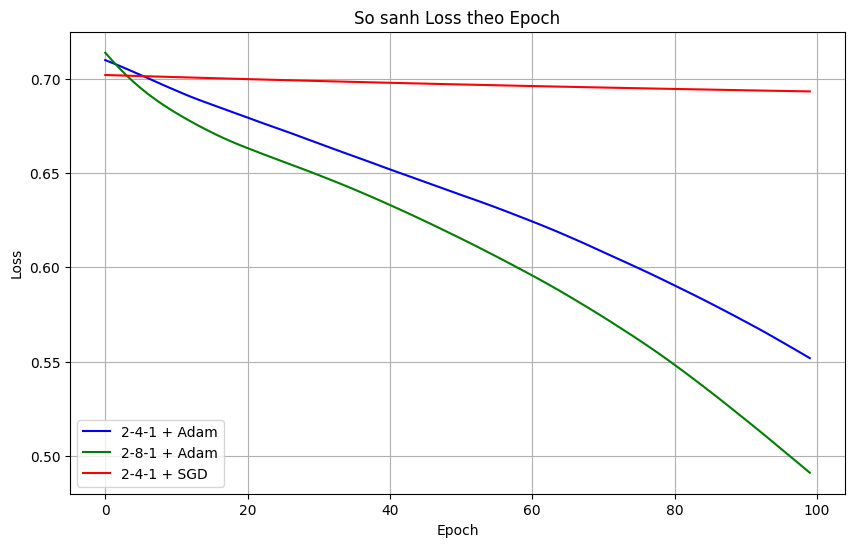


Ket qua cuoi cung:
2-4-1 + Adam: Loss = 0.5519
2-8-1 + Adam: Loss = 0.4912
2-4-1 + SGD:  Loss = 0.6932


In [23]:
# Tao lai du lieu
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Luu loss moi epoch
losses_4_adam = []     # 2-4-1 voi Adam
losses_8_adam = []     # 2-8-1 voi Adam  
losses_4_sgd = []      # 2-4-1 voi SGD

epochs = 100

# Huan luyen mo hinh 1: 2-4-1 voi Adam
model1 = ANN_4nodes()
optimizer1 = optim.Adam(model1.parameters(), lr=0.01)
criterion = nn.BCELoss()

for epoch in range(epochs):
    model1.train()
    optimizer1.zero_grad()
    outputs = model1(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer1.step()
    losses_4_adam.append(loss.item())

# Huan luyen mo hinh 2: 2-8-1 voi Adam
model2 = ANN_8nodes()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

for epoch in range(epochs):
    model2.train()
    optimizer2.zero_grad()
    outputs = model2(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer2.step()
    losses_8_adam.append(loss.item())

# Huan luyen mo hinh 3: 2-4-1 voi SGD
model3 = ANN_4nodes()
optimizer3 = optim.SGD(model3.parameters(), lr=0.01)

for epoch in range(epochs):
    model3.train()
    optimizer3.zero_grad()
    outputs = model3(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer3.step()
    losses_4_sgd.append(loss.item())

# Ve do thi
plt.figure(figsize=(10, 6))
plt.plot(losses_4_adam, label='2-4-1 + Adam', color='blue')
plt.plot(losses_8_adam, label='2-8-1 + Adam', color='green')
plt.plot(losses_4_sgd, label='2-4-1 + SGD', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('So sanh Loss theo Epoch')
plt.legend()
plt.grid(True)
plt.show()

print("\nKet qua cuoi cung:")
print(f"2-4-1 + Adam: Loss = {losses_4_adam[-1]:.4f}")
print(f"2-8-1 + Adam: Loss = {losses_8_adam[-1]:.4f}")
print(f"2-4-1 + SGD:  Loss = {losses_4_sgd[-1]:.4f}")

## Mục tiêu
Sau khi hoàn thành lab về ANN, bài tập này giúp bạn củng cố kiến thức bằng cách:
1. Thay đổi cấu trúc ANN và quan sát ảnh hưởng đến hiệu suất.
2. Thử nghiệm với các hàm mất mát và tối ưu hóa khác.
3. Phân tích kết quả qua biểu đồ và số liệu.

## Hướng dẫn
- Sử dụng file `ANN_Lab.ipynb` từ lab làm nền tảng.
- Gửi bài làm dưới dạng file `.ipynb` với phần code và câu trả lời viết trong ô Markdown.
- Hạn nộp: [Điền ngày nộp, ví dụ: 21/03/2025].

## Định dạng nộp bài
- Tạo file `.ipynb` mới với cấu trúc:  
  - **Phần 1**: Code và câu trả lời cho "Thay đổi cấu trúc ANN".  
  - **Phần 2**: Code và câu trả lời cho "Thử nghiệm với hàm mất mát và tối ưu hóa".  
  - **Phần 3**: Code vẽ đồ thị và câu trả lời cho "Phân tích kết quả".  
- Đặt tên file: `[HọTên]_ANN_Homework.ipynb` (ví dụ: `NguyenVanA_ANN_Homework.ipynb`).

# Bài này sẽ học trong 2 tuần 